<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Long format, wide format, pivot tables, and melting

Week 2 | Lesson 3.1

---

This lesson is all about data transformation in pandas. Data transformation is in essense reorganizing the rows and columns of your dataset to be a different shape and format. 

The benefits to transforming your data are primarily for easier access and manipulation of data, whether it be through easier masking/conditional statements or because you would prefer to operate across columns or down rows. 

Over time you will get a feel for which data formats are better for different tasks. This lesson, however, is focused in large part on the _functional application_ of data transformation. How do you do this to a dataset?

---

In [3]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

---

## 1. "Wide" format data

**Wide** format data is the more common format of data for .csv type files. You are already familiar with wide format data: I believe all of the datasets we have been using thus far have been in wide format.

Wide format data is formatted with criteria:

- There are multiple ID _and_ value columns. In other words, there is a column for every "variable" with its own unique values.
- The format has both the conceptual simplicity of a single column of values per variable and a more compact matrix.
- Is not useful for SQL-style operations: it can make it much harder or even impossible to join tables together on a value.
- Can be more useful in pandas when you need to preform operations on variables **across columns**. For example, multiplying columns together.
- It is the most commonly the format that you will put the data in when you are ready to perform modeling (with some exceptions). When we get into modeling next week I will explain why.

---

## 2. Load  "Nerdy Personality Attributes" dataset

This is a parsed and modified version of the full "Nerdy Personality Attributes" survey that asked subjects to self-rate on questions related to "nerdiness" as well as more general personality traits such as openness and extraversion. Demographic information on the subjects was also collected.

In this modified version, for the sake of example, some of the subjects have only data for the survey and not the demographic variables. Because there are missing values and the data in general is "messy", this is also in part a data cleaning problem.

We will load the data in wide format first:


In [10]:
#Does long data take up less memeory?
nerdy_wide_f = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/nerdy_personality_attributes/NPAS_parsed_trunc_wide_missing.csv'
nerdy_wide = pd.read_csv(nerdy_wide_f)

In [11]:
nerdy_wide.head()

,subject_id,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
0,0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


In [12]:
nerdy_wide.shape

(1391, 57)

In [13]:
nerdy_wide.isnull().sum()

subject_id                        0
academic_over_social              0
age                             691
anxious                           0
bookish                           0
books_over_parties                0
calm                              0
collect_books                     0
conventional                      0
critical                          0
dependable                        0
diagnosed_autistic                0
disorganized                      0
education                       691
engnat                          691
enjoy_learning                    0
excited_about_research            0
extraverted                       0
familysize                      691
gender                          691
hand                            691
hobbies_over_people               0
in_advanced_classes               0
intelligence_over_appearance      0
interested_science                0
introspective                     0
libraries_over_publicspace        0
like_dry_topics             

In [18]:
#Are all the columns missing in similar fashion?
where_age_null = nerdy_wide['age'].isnull() #Create df that represents boolean value for each cell for null of age
nerdy_wide[where_age_null].isnull().sum() #Subselect all rows where age is null and get the sum of null value in cols

subject_id                        0
academic_over_social              0
age                             691
anxious                           0
bookish                           0
books_over_parties                0
calm                              0
collect_books                     0
conventional                      0
critical                          0
dependable                        0
diagnosed_autistic                0
disorganized                      0
education                       691
engnat                          691
enjoy_learning                    0
excited_about_research            0
extraverted                       0
familysize                      691
gender                          691
hand                            691
hobbies_over_people               0
in_advanced_classes               0
intelligence_over_appearance      0
interested_science                0
introspective                     0
libraries_over_publicspace        0
like_dry_topics             

In [30]:
nerdy_wide_demo = nerdy_wide[~where_age_null] # ~ operator inverts numpy boolean arrays
nerdy_wide_demo.isnull().sum()

subject_id                        0
academic_over_social              0
age                               0
anxious                           0
bookish                           0
books_over_parties                0
calm                              0
collect_books                     0
conventional                      0
critical                          0
dependable                        0
diagnosed_autistic                0
disorganized                      0
education                         0
engnat                            0
enjoy_learning                    0
excited_about_research            0
extraverted                       0
familysize                        0
gender                            0
hand                              0
hobbies_over_people               0
in_advanced_classes               0
intelligence_over_appearance      0
interested_science                0
introspective                     0
libraries_over_publicspace        0
like_dry_topics             

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1149f9250>]], dtype=object)

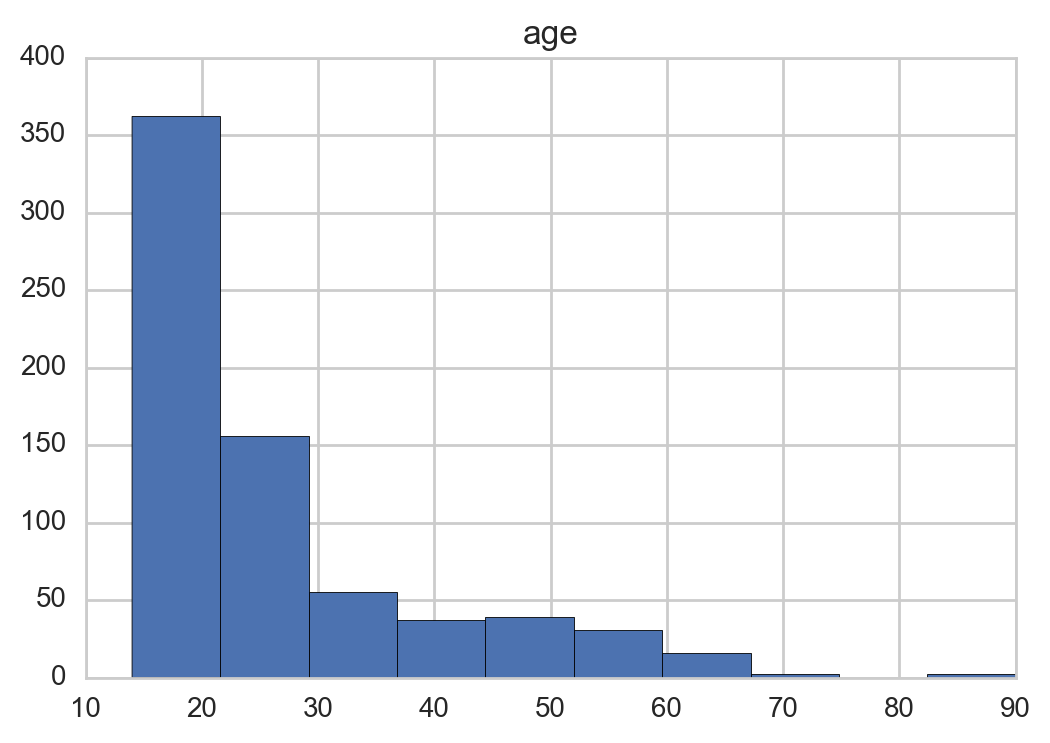

In [22]:
nerdy_wide_demo.hist(column='age')

In [27]:
nerdy_wide_demo['major'].value_counts()[:]

Psychology                          27
psychology                          19
English                             16
Computer Science                    10
Music                                8
Physics                              8
Biology                              8
Economics                            7
Art                                  6
Nursing                              5
biology                              5
Political Science                    5
History                              5
history                              5
mechanical engineering               4
Engineering                          4
Business                             4
Chemistry                            4
Math                                 4
Geology                              3
Anthropology                         3
sociology                            3
Mathematics                          3
Linguistics                          3
computer science                     3
Computer science         

In [39]:
nerdy_wide_demo.loc[nerdy_wide_demo['major'].isnull(), 'major'] = 'unknown'

/Users/austinwhaley/anaconda/envs/dsi/lib/python2.7/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [42]:
nerdy_wide_demo.loc[nerdy_wide_demo['major'] == 'psychology', 'age']
#Take the nerdy_wide_demo dataframe and select
#row = all rows where major is psychology and columns age
#then xref those two results


8       25.0
54      22.0
58      39.0
136     27.0
206     32.0
247     22.0
320     26.0
371     19.0
462     22.0
513     20.0
546     27.0
547     20.0
572     22.0
591     28.0
598     20.0
614     20.0
637     38.0
687     31.0
696     20.0
712     20.0
730     29.0
747     20.0
763     19.0
790     21.0
858     24.0
861     27.0
877     18.0
898     21.0
974     31.0
998     17.0
1026    25.0
1036    19.0
1055    29.0
1062    39.0
1074    37.0
1083    30.0
1096    18.0
1101    19.0
1106    19.0
1149    44.0
1213    35.0
1270    25.0
1275    46.0
1302    20.0
1338    33.0
1356    19.0
Name: age, dtype: float64

In [40]:
nerdy_wide_demo.isnull().sum() #checks the results of the above function

subject_id                      0
academic_over_social            0
age                             0
anxious                         0
bookish                         0
books_over_parties              0
calm                            0
collect_books                   0
conventional                    0
critical                        0
dependable                      0
diagnosed_autistic              0
disorganized                    0
education                       0
engnat                          0
enjoy_learning                  0
excited_about_research          0
extraverted                     0
familysize                      0
gender                          0
hand                            0
hobbies_over_people             0
in_advanced_classes             0
intelligence_over_appearance    0
interested_science              0
introspective                   0
libraries_over_publicspace      0
like_dry_topics                 0
like_hard_material              0
like_science_f

## 3. "Long" format

Now we can load the same data in but in what's commonly referred to as "long format". 

Long data is formatted with criteria:

- Potentially multiple "id" (identification) columns.
- Variable:value column pairs that match a variable key to a value (in the simple case, a single variable column and a single value column).
- The "variable" column corresponds to the multiple variable columns in your wide format data. Now, instead of a column for each variable, you have a row for each variable:value pair, per id. 
- This is a standard format in SQL databases because it is appropriate for joining different tables together by keys.

In [ ]:
#LONG FORMAT IS SUPERIOR TO WIDE
#More Flexible
#More memory efficient

In [43]:
nerdy_long_f = '/Users/austinwhaley/Desktop/DSI-SF-4/datasets/nerdy_personality_attributes/NPAS_parsed_trunc_long_missing.csv'
nerdy_long = pd.read_csv(nerdy_long_f)

In [45]:
nerdy_long.shape

(70295, 3)

In [46]:
nerdy_long.head()

,subject_id,variable,value
0,1,education,4.0
1,2,education,3.0
2,5,education,2.0
3,6,education,2.0
4,7,education,2.0


In [50]:
#nerdy_long[nerdy_long['subject_id'] == 1]

major_null_mask = (nerdy_long['variable'] == 'major') & (nerdy_long['value'].isnull())

nerdy_long[major_null_mask].head()

,subject_id,variable,value
7003,6,major,NaN
7004,7,major,NaN
7006,9,major,NaN
7007,10,major,NaN
7010,19,major,NaN


You can see that the unique values in the variable column correspond to the column headers in the wide format data:

In [52]:
nerdy_long['variable'].unique() #Essentially gets all the unique values aka column headers in wide format

array(['education', 'urban', 'gender', 'engnat', 'age', 'hand', 'religion',
       'voted', 'married', 'familysize', 'major', 'race_white',
       'race_nerdy', 'race_native_american', 'writing_novel',
       'read_tech_reports', 'online_over_inperson', 'introspective',
       'hobbies_over_people', 'books_over_parties', 'bookish',
       'libraries_over_publicspace', 'race_native_austrailian',
       'like_hard_material', 'race_hispanic', 'diagnosed_autistic',
       'play_many_videogames', 'race_arab', 'race_asian',
       'interested_science', 'playes_rpgs', 'in_advanced_classes',
       'collect_books', 'intelligence_over_appearance',
       'watch_science_shows', 'academic_over_social',
       'like_science_fiction', 'like_dry_topics', 'race_black', 'calm',
       'disorganized', 'extraverted', 'dependable', 'critical',
       'opennness', 'anxious', 'sympathetic', 'reserved', 'conventional',
       'was_odd_child', 'prefer_fictional_people', 'enjoy_learning',
       'excited_abou

Let's again replace the `major` variables with 'unknown', but in a way that works with long format data:

In [53]:
#Create a mask for selecting data
#Select all data tht is xref 
major_null_mask = (nerdy_long['variable'] == 'major') & (nerdy_long['value'].isnull())

nerdy_long.loc[major_null_mask, 'value'] = 'unknown'

In [ ]:
#Long to wide = shit
#wide to long = easy

## Pandas `pivot_table()`: long to wide format

The `pd.pivot_table()` function is a very powerful tool to both transform data from long to wide format and also to conveniently summarize data into a matrix with arbitrary functions.

First we'll look at how we transform this long format data back into the wide format data.

**Parameters to note in the function:**

    nerdy_long: the pivot_table() function takes a dataframe to pivot as its first argument
    
- **`columns`**: this is the list of columns in the wide format data to transform back to columns in wide format, with each unique value in the long format column becoming a header for the wide format   
- **`values`**: a single column indicating the values to use when pivoting and filling in the new wide format columns
- **`index`**: columns in the long format data that are index variables – this means that these will be left as single columns, not spread out across columns by unique value such as in the columns parameter 
- **`aggfunc`**: often pivot_table() is used to perform a summary of the data. aggfunc stands for "aggregation function". It is required and defaults to np.mean. You can put your own function in, which I do below.
- **`fill_value`**: if a cell is missing for the wide format data, the value to fill in
    
I am putting in my own function, `select_item_or_nan()` to the `aggfunc` keyword argument. Because my `subject_id` column has a single variable value for each id, I just want the single element in the long format value cell. My data is messy and so I have to write a function to check for some places it can break. 

Note: `x` passed into my function is a series object (weirdly). I pull out the first element of that with the `.iloc` indexer.

In [56]:
#aggfunc = 

def custom_aggregation_function(x): # x = series
    try:
        return x.iloc[0]
    except:
        return np.nan

nerdy_to_wide = pd.pivot_table(nerdy_long, columns=['variable'], values='value',
                              index='subject_id', fill_value=np.nan,
                              aggfunc=custom_aggregation_function)

In [57]:
nerdy_to_wide.head()

variable,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,7.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,4.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


### Multiindex/Hierarchical indexing pt. 1

Below in the header you can see that the format of the wide data is not the same as our original loaded wide format. Pandas implements something called **Multiindexing** or **Hierarchical indexing** which allows for "tiered" row and column labels.

Right now it is not that bad, but this can get very complicated and annoying which we will see further down in the lesson.

The main difference here is that we have a `variable` name in the top left corner, which is "labeling" our columns (and corresponds to the name of our original column in the long format data). The row indexer has become our single key/id variable `subject_id`. The columns are what we would expect here, each one a variable like in the original wide data.

In [58]:
nerdy_to_wide.head(3)

variable,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,dependable,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
subject_id,,,,,,,,,,,,,,,,,,,,,
0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,7.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,5.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,3.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0


Let's drop the null values from our recreated wide data.

Remember our `subject_id` is now the **index**, and so we can access it with the `.index` attribute.

We can use the dataframe function `.reset_index()` to move `subject_id` into a column and create a new index. Now we have the dataframe in the format we got when we loaded the original wide data in before. The only exception is that we still have that "variable" column label.

In [62]:
#reset_index()
nerdy_to_wide2 = nerdy_to_wide.reset_index(drop=True)
nerdy_to_wide2.head()

variable,subject_id,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
0,0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


You can remove the column label (which I personally find confusing) by setting the `.columns.name` attribute to None.

## `pivot_table` for summarization

For those of you who are experienced with Excel, the pandas pivot table does the same thing as the pivot table in Excel. It's more powerful, but obviously harder to use than the user-friendly spreadsheet version.

Next we'll use pivot table to generate some summary statistics for `anxious`, `bookish`, and `calm` by `major`. 

We can do it two ways. First let's subset the data just to those columns and subject id.

In [77]:
#pd.melt is the opposite of pd.pivot_table
nerdy_subset = nerdy_to_wide2[['subject_id','major','anxious','bookish','calm']]
#nerdy_subset = nerdy_to_wide2[['subject_id', 'major', 'anxious', 'bookish', 'calm']]
nerdy_subset.head()

variable,subject_id,major,anxious,bookish,calm
0,0,NaN,1.0,5.0,7.0
1,1,biophysics,4.0,4.0,6.0
2,2,biology,7.0,5.0,2.0
3,3,NaN,4.0,4.0,7.0
4,4,NaN,3.0,5.0,6.0


In [78]:
#nerdy_subset.loc[nerdy_subset['major'].isnull(), 'major'] = 'unknown' #Mine
nerdy_subset.loc[nerdy_subset.major.isnull(), 'major'] = 'unknown' #Kefier's 

### Going from wide to long with `.melt()`

**`.melt()`** is a function that essentially performs the inverse operation of `pivot_table` on dataframes.

Melt takes a dataframe as its first argument. Additional arguments typically used in the melt function are:

- **`id_vars`**: the column or columns that will be id variables. id variables contain datapoints specified by the variable and value columns
- **`value_vars`**: a list that specifies which columns should be converted into a single value column and variable column.
- **`var_name`**: the header name of the variable column (default='variable')
- **`value_name`**: the header name of the value column (default='value')

Below I only specify the `id_vars` as subject_id and major. The variable and value columns are inferred.

In [81]:
subset_long = pd.melt(nerdy_subset, id_vars=['subject_id', 'major'])
subset_long.head(10)

,subject_id,major,variable,value
0,0,unknown,anxious,1.0
1,1,biophysics,anxious,4.0
2,2,biology,anxious,7.0
3,3,unknown,anxious,4.0
4,4,unknown,anxious,3.0
5,5,Geology,anxious,5.0
6,6,unknown,anxious,1.0
7,7,unknown,anxious,7.0
8,8,psychology,anxious,5.0
9,9,unknown,anxious,6.0


You can do the same thing as above without having to subset the dataframe first by simply specifying the value_vars to lengthen. The output dataframe will then not have information on the columns left out of the `id_vars` and `value_vars` arguments.

The value column is still a string, so we can convert it to float:

In [82]:
subset_long.head(3)

,subject_id,major,variable,value
0,0,unknown,anxious,1.0
1,1,biophysics,anxious,4.0
2,2,biology,anxious,7.0


### Summarizing with aggregate functions

Pivot table can take in the long format variable, value, and an index to group by and apply aggregate functions as well for summarizing data easily. Note that your index variable should not be pulling out unique rows (for example, subject_id by variable would only have one value to send into the aggregate functions).

The output dataframe gives you a "hierarchical" column index – the three variable for each aggregate function. The row index is the majors you divided the data up by.

If you apply more index variables to split by, the row indices will also become hierarchical! It can get complicated fast.

In [87]:
subset_long.value = subset_long.value.astype(float)

In [88]:
major_summary = pd.pivot_table(subset_long, columns='variable', values='value',
                              index='major', aggfunc=[np.mean, np.median, np.std, len])

In [89]:
major_summary.head(10)

mean            \
variable                                             anxious   bookish   
major                                                                    
 None yet                                           7.000000  3.000000   
+ACI-+ACIAIg-hotel and restaurant management+AC...  2.000000  2.000000   
Aerospace Engineer                                  2.000000  2.000000   
Aerospace Engineering                               3.000000  4.000000   
Agricultural Economics                              2.000000  2.000000   
Anthropology                                        5.333333  3.666667   
Anthropology                                        5.000000  4.000000   
Architecture                                        3.000000  4.000000   
Architecture                                        5.000000  1.000000   
Art                                                 4.000000  4.333333   

                                                              median          \
variable                                                calm anxious bookish   
major                                                                          
 None yet                                           3.000000     7.0     3.0   
+ACI-+ACIAIg-hotel and restaurant management+AC...  7.000000     2.0     2.0   
Aerospace Engineer                                  7.000000     2.0     2.0   
Aerospace Engineering                               3.000000     3.0     4.0   
Agricultural Economics                              6.000000     2.0     2.0   
Anthropology                                        4.333333     5.0     4.0   
Anthropology                                        3.000000     5.0     4.0   
Architecture                                        5.666667     4.0     4.0   
Architecture                                        5.000000     5.0     1.0   
Art                                                 5.333333     5.0     4.5   

                                                              std            \
variable                                           calm   anxious   bookish   
major                                                                         
 None yet                                           3.0       NaN       NaN   
+ACI-+ACIAIg-hotel and restaurant management+AC...  7.0       NaN       NaN   
Aerospace Engineer                                  7.0       NaN       NaN   
Aerospace Engineering                               3.0       NaN       NaN   
Agricultural Economics                              6.0       NaN       NaN   
Anthropology                                        4.0  0.577350  0.577350   
Anthropology                                        3.0       NaN       NaN   
Architecture                                        6.0  1.732051  1.000000   
Architecture                                        5.0       NaN       NaN   
Art                                                 5.5  2.366432  0.816497   

                                                                 len          \
variable                                                calm anxious bookish   
major                                                                          
 None yet                                                NaN     1.0     1.0   
+ACI-+ACIAIg-hotel and restaurant management+AC...       NaN     1.0     1.0   
Aerospace Engineer                                       NaN     1.0     1.0   
Aerospace Engineering                                    NaN     1.0     1.0   
Agricultural Economics                                   NaN     1.0     1.0   
Anthropology                                        2.516611     3.0     3.0   
Anthropology                                             NaN     1.0     1.0   
Architecture                                        1.527525     3.0     3.0   
Architecture                                             NaN     1.0     1.0   
Art                                                 1.211060    

The `.names` attribute on the index and the columns will show you the hierarchy of labels. The row index is "major", and the two column indices are None and 'variable' (the aggregate functions get no label from pivot table in this case). 

If you print out the columns, you can see it has become a pandas `MultiIndex` object that has levels, labels, and names. I won't go into too much detail on this – reading the pandas documentation on MultiIndexes has a lot more information.

Indexing along the hierarchical column headers can be done with chained bracket keys, with the top level column label in the first bracket down to the bottom level.

In some cases you can just split them up by comma within the brackets.

## Converting a MultiIndex dataframe to "flat"

Personally, while I see multiindex dataframes as potentiall useful and a cool concept, I think the overhead and confusion on how to subset/mask them is annoying, especially when you have to start doing modeling pulling out data from these DataFrames.

To "flatten" a multi-indexed dataframe down, you can use the `.to_records()` function. To make this a new dataframe, it needs to be wrapped in a `pd.DataFrame()` like so:

You can see that the new column names are tuples of the hierarchy of the multiindexed columns. You can convert these to new, more easily indexed columns with a list comprehension, for example with the comprehension below.

The **eval** function takes a string and trys to evaluate it as if it were a python command! Be careful with this function.

---

## Preface to merging/joining: long and wide data

You will practice merging and joining much more tomorrow, but this section is a preview for what is to come with a focus on the difference between merging long and wide datasets together.

Load in the data we've been using above, but now split up with just the demographic variables in one dataset and the survey question answers in another. These datasets are in wide format, and they both contain `subject_id` to identify who the questions are for. 

As you may recall, the demographic responses have fewer observations.

In [4]:
n_demos_file = '/Users/kiefer/github-repos/DSI-SF-4/datasets/nerdy_personality_attributes/NPAS_parsed_trunc_demo_sample.csv'
n_survey_file = '/Users/kiefer/github-repos/DSI-SF-4/datasets/nerdy_personality_attributes/NPAS_parsed_trunc_survey.csv'

#demos_subset = pd.read_csv(n_demos_file)
#survey = pd.read_csv(n_survey_file)

### Pandas `.merge()` function

The merge function is a built-in function in a DataFrame. The first argument is another DataFrame that you want to merge it with, and the `on` keyword argument is the key or keys that you want the DataFrames to be "matched" on.

We are specifying `how='inner'` here, which essentially means that the subject_id has to be present in both dataframes to merge them together and return them. Because the demographics dataset has fewer subject_ids, it will only merge the subject_id rows from the survey dataset that are present in the demographics dataset.

### Make the demographic and survey data long format using melt

This is the same way we used melt in a previous section. 

- For the demographic dataframe, specify two id_vars, gender and subject_id.
- For the survey dataframe, only specify subject_id for id_vars

Merge together the long form datasets just like we did before with the wide format data.

Here we will still merge on 'subject_id' with 'inner' for the how variable. We have duplicate named columns in each of these dataframes ('variable' and 'value'). We can specify `suffixes=('_survey','_demo')` to give the instances of the survey and demographic dataframes appropriate column names when they are joined together.

### Pivot with the merged long dataframe

Now, use the pivot_table function on the merged demographics and survey dataframes (the long one) with columns the variable column for survey as well as the variable column for the demographics. Make the values the survey values column and the index gender. Set the aggregate function to just be the mean.

For example:

```python
demo_survey_means = pd.pivot_table(demos_survey_long, columns=['variable_survey', 'variable_demo'], 
                                   values='value_survey',
                                   index=['gender'], aggfunc=[np.mean],
                                   fill_value=np.nan)
```

You can see that if you specify multiple variable columns in the columns argument, it will stack them in a hierarchical column setup. So, for every variable in variable_survey, the mean for each gender for each variable in variable_demo.

A simpler version below just has the variable_demo in the columns argument, in which case it calculates the mean across those variables for each gender in the dataframe.